In [61]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import random 
import math
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
from mpl_toolkits.mplot3d import Axes3D

In [72]:
class RandomWalk:
    def __init__(self):
        self.num_states = 7
        self.true_values = np.zeros(self.num_states)
        self.init_true_values()
        self.est_values = np.zeros(self.num_states)
        self.init_est_values()
        LEFT = 0
        RIGHT = 1
        self.actions = [LEFT,RIGHT]
        
        
    def init_true_values(self):
        for i in range(self.num_states):
            if i>0 and i<6:
                self.true_values[i] = i/6
            elif i == 0:
                self.true_values[i] = 0
            elif i == 6:
                self.true_values[i] = 1
                
                
    def init_est_values(self):
        for i in range(self.num_states):
            if i>0 and i<6:
                self.est_values[i] = 0.5
            elif i == 0:
                self.est_values[i] = 0
            elif i == 6:
                self.est_values[i] = 1
                
            
                
    def TD(self,values, alpha = 0.1):
        #initialize S which is state C and according to index it is 3
        S_prime = 3
        #one_step update , bootstrapping 
        while True:
            S = S_prime
            action = np.random.binomial(1, 0.5)
            if action == self.actions[0]:
                S_prime -= 1
            else:
                S_prime += 1
            reward = 0
            # TD update
            values[S] += alpha * (reward + values[S_prime] - values[S])
            if S_prime == 0 or S_prime == 6:
                break
        return values
    
    
    def MC(self,values,alpha):
        #initialize S which is state C and according to index it is 3
        S = 3
        Episode = [3]

        #if end up with left terminal state, all returns are 0  and 1 if right terminal state
        # anywhere else returns are 0
        #generate the complete episode
        while True:
            action = np.random.binomial(1, 0.5)
            if action == self.actions[0]:
                S -= 1
            else:
                S += 1
            Episode.append(S)
            if S == 6:
                G = 1.0
                break
            elif S == 0:
                G = 0.0
                break
        
        for state in Episode[:-1]:
            #MC update
            values[state] += alpha * (G - values[state])
        return values
    

    
    def predictValues(self,num_episodes_list):
        est_values = np.copy(self.est_values)
        xvals = ['A','B','C','D','E']
        plt.figure(1)
        for num_episodes in num_episodes_list:
            for i in range(num_episodes):
                est_values = self.TD(est_values)
            #print(est_values[1:6])
            plt.plot(xvals,est_values[1:6], label=str(num_episodes) + ' episodes')
        plt.plot(xvals,self.true_values[1:6], label='True values')
        plt.xlabel('State')
        plt.ylabel('Estimated value')
#         plt.xticks(['A','B','C','D','E'])
        plt.ylim(0.0,0.9)
        plt.legend()
        plt.show()
        
    
    def empiricalRMSError(self,TD_alphas_list, MC_alphas_list,num_episodes,runs):
        plt.figure(1)
        avg_num_states = 5.0
        for alpha in TD_alphas_list:
            total_rmse_errors = np.zeros(num_episodes)
            for run in trange(runs):
                rmse_error = []
                est_values = np.copy(self.est_values)
                for i in range(num_episodes):
                    squared_error = np.power(self.true_values - est_values, 2)
                    sqrt_error = np.sqrt(np.sum(squared_error) / avg_num_states)
                    rmse_error.append(sqrt_error)
                    est_values = self.TD(est_values, alpha)
                total_rmse_errors += np.asarray(rmse_error)
            total_rmse_errors /= runs
            plt.plot(total_rmse_errors, linestyle='solid', label = 'TD, alpha = %.02f' % (alpha))
            
            
        for alpha in MC_alphas_list:
            total_rmse_errors = np.zeros(num_episodes)
            for run in trange(runs):
                rmse_error = []
                est_values = np.copy(self.est_values)
                for i in range(num_episodes):
                    squared_error = np.power(self.true_values - est_values, 2)
                    sqrt_error = np.sqrt(np.sum(squared_error) / avg_num_states)
                    rmse_error.append(sqrt_error)
                    est_values = self.MC(est_values, alpha)
                total_rmse_errors += np.asarray(rmse_error)
            total_rmse_errors /= runs
            plt.plot(total_rmse_errors, linestyle='dashed', label = 'MC, alpha = %.02f' % (alpha))
        plt.xlabel('Walks / Episodes')
        plt.ylabel('Empirical RMS error')
        plt.ylim(0.0,0.25)
        plt.title('Empirical RMS error averaged over states')
        plt.legend()
        plt.show()


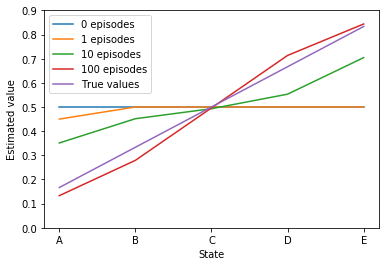

100%|██████████| 100/100 [00:00<00:00, 356.17it/s]


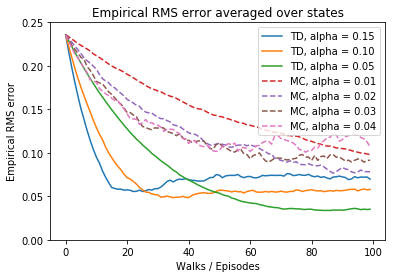

In [74]:
if __name__=='__main__':
    rw = RandomWalk()
    num_episodes_list = [0,1,10,100]
    rw.predictValues(num_episodes_list)
    rw2 = RandomWalk()
    TD_alphas_list = [0.15, 0.1, 0.05]
    MC_alphas_list = [0.01, 0.02, 0.03, 0.04]
    num_episodes = 100
    runs = 100
    rw2.empiricalRMSError(TD_alphas_list, MC_alphas_list,num_episodes,runs)